1. Tentukan Library yang digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

2. Load data

In [38]:
datagizi_dataset = pd.read_csv('datasetgizi.csv')
array = datagizi_dataset.values


In [39]:
datagizi_dataset.head()

,Jenis_Kelamin,Usia_Saat_Ukur,Berat_Badan,Tinggi_Badan,Label
0,L,2 Tahun - 3 Bulan - 4 Hari,11.9,85.0,Normal
1,P,0 Tahun - 1 Bulan - 16 Hari,4.4,53.5,Normal
2,L,1 Tahun - 8 Bulan - 26 Hari,11.5,85.3,Normal
3,L,0 Tahun - 8 Bulan - 6 Hari,8.9,69.0,Normal
4,P,0 Tahun - 1 Bulan - 5 Hari,4.3,55.0,Normal


In [40]:
datagizi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Jenis_Kelamin   436 non-null    object 
 1   Usia_Saat_Ukur  436 non-null    object 
 2   Berat_Badan     436 non-null    float64
 3   Tinggi_Badan    436 non-null    float64
 4   Label           436 non-null    object 
dtypes: float64(2), object(3)
memory usage: 17.2+ KB


In [41]:
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt

In [42]:
fig = px.bar(datagizi_dataset['Jenis_Kelamin'].value_counts(),
             title="Melihat data Jenis_Kelamin desa hila")
fig.show()

In [43]:
datagizi_dataset['Label'].value_counts()

Label
Normal         423
Gizi Kurang     12
Gizi Buruk       1
Name: count, dtype: int64

In [44]:
datagizi_dataset['Label'] = datagizi_dataset['Label'].replace(['Gizi Buruk'],'Gizi Kurang')

In [45]:
datagizi_dataset['Label'].value_counts()

Label
Normal         423
Gizi Kurang     13
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
le = LabelEncoder()

In [47]:
#untuk mentranformasikan isi kolam yang berupa kategorikal menjadi numerik
for column in datagizi_dataset:
    if datagizi_dataset[column].dtypes == object:
        datagizi_dataset[column] = le.fit_transform(datagizi_dataset[column])

In [48]:
datagizi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Jenis_Kelamin   436 non-null    int32  
 1   Usia_Saat_Ukur  436 non-null    int32  
 2   Berat_Badan     436 non-null    float64
 3   Tinggi_Badan    436 non-null    float64
 4   Label           436 non-null    int32  
dtypes: float64(2), int32(3)
memory usage: 12.1 KB


In [49]:
#untuk mentranformasikan isi kolam yang berupa kategorikal menjadi numerik
for column in datagizi_dataset:
    if datagizi_dataset[column].dtypes == float:
        datagizi_dataset[column] = le.fit_transform(datagizi_dataset[column])

In [50]:
datagizi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Jenis_Kelamin   436 non-null    int32
 1   Usia_Saat_Ukur  436 non-null    int32
 2   Berat_Badan     436 non-null    int64
 3   Tinggi_Badan    436 non-null    int64
 4   Label           436 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 12.1 KB


In [51]:
datagizi_dataset.head()

,Jenis_Kelamin,Usia_Saat_Ukur,Berat_Badan,Tinggi_Badan,Label
0,0,152,59,104,1
1,1,1,3,2,1
2,0,102,55,106,1
3,0,42,33,31,1
4,1,3,2,3,1


In [52]:
datagizi_dataset['Label'].value_counts()

Label
1    423
0     13
Name: count, dtype: int64

In [53]:
import numpy as np
import matplotlib.pyplot as plt #untuk visualisasi pohon keputusan
from sklearn.tree import DecisionTreeClassifier, plot_tree # untuk menggunakan decisionTree dan menggambar pohon keputusan
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [54]:
atr_data = datagizi_dataset.drop(columns = 'Label')
atr_data

,Jenis_Kelamin,Usia_Saat_Ukur,Berat_Badan,Tinggi_Badan
0,0,152,59,104
1,1,1,3,2
2,0,102,55,106
3,0,42,33,31
4,1,3,2,3
...,...,...,...,...
431,1,366,92,220
432,0,374,89,227
433,1,378,89,234
434,1,141,62,121


In [55]:
cls_data = datagizi_dataset['Label']
cls_data

0      1
1      1
2      1
3      1
4      1
      ..
431    1
432    1
433    1
434    1
435    1
Name: Label, Length: 436, dtype: int32

In [56]:
x_train, x_test, y_train, y_test, = train_test_split(atr_data ,cls_data , test_size = 0.25, random_state = 0)

print("x_train =", len(x_train))
print("x_test =", len(x_test))
print("y_train =", len(y_train))
print("y_test =", len(y_test))

x_train = 327
x_test = 109
y_train = 327
y_test = 109


In [57]:
model =tree.DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0,max_leaf_nodes=None,min_impurity_decrease=0)

In [58]:
# Melatih model
tree = model.fit(x_train, y_train)

In [59]:
# melakukan prediksi
y_pred = model.predict(x_test)

In [60]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Menampilkan hasil evaluasi
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Presisi: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(f1 * 100))

Akurasi: 97.25%
Presisi: 98.60%
Recall: 70.00%
F1-Score: 77.86%


In [61]:
# Menggunakan classification_report dengan zero_division
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.97      1.00      0.99       104

    accuracy                           0.97       109
   macro avg       0.99      0.70      0.78       109
weighted avg       0.97      0.97      0.97       109



In [62]:
#Confusion Matrix
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[  2   3]
 [  0 104]]


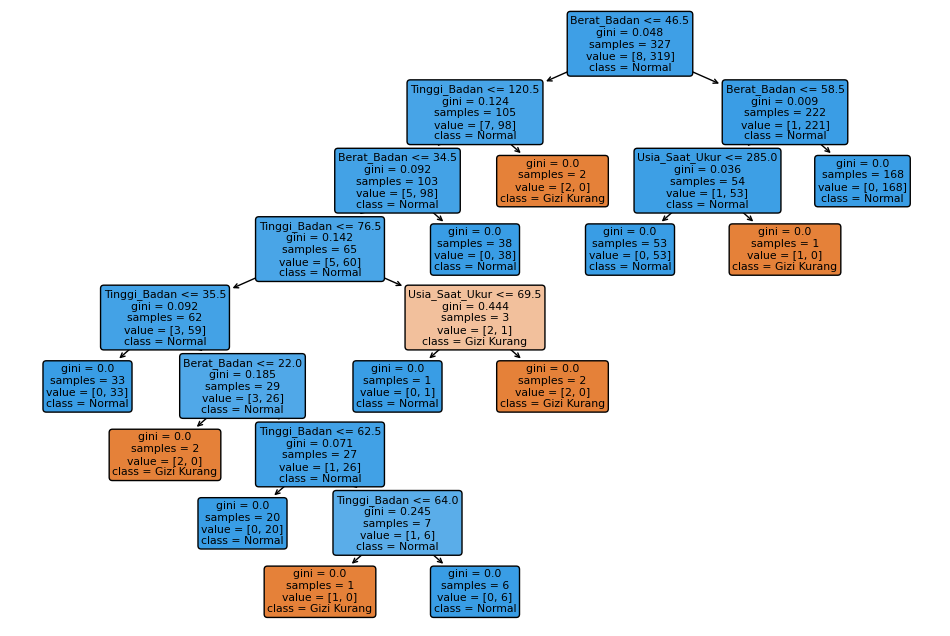

In [63]:
# Menampilkan grafik keputusan
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=atr_data.columns, class_names=['Gizi Kurang','Normal'], filled=True, rounded=True)
plt.show()

In [64]:
input_data = (0,152,59,104)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


prediction = tree.predict(input_data_reshape)
print(prediction)

#kondisi
if(prediction[0]== 1):
    print('Status Gizi Anak Gizi Normal')

else :
    print('Status Gizi Anak Gizi Kurang')


[1]
Status Gizi Anak Gizi Normal


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Simpan Model

In [65]:
import pickle

In [66]:
filename = 'StatusGizi_model.sav'
pickle.dump(tree, open(filename,'wb'))